In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from skimage import filters

In [2]:
img1 = cv2.imread('./people1_01.ppm')
img2 = cv2.imread('./people1_02.ppm')

img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

In [3]:
img1 = img1/255.0
img2 = img2/255.0

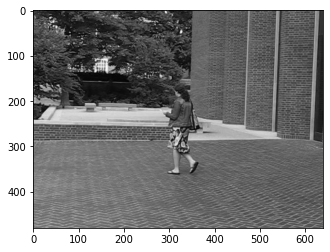

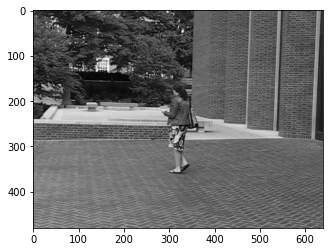

In [6]:
plt.imshow(img1, cmap = 'gray')
plt.show()
plt.imshow(img2, cmap = 'gray')
plt.show()

In [7]:
img1 = cv2.blur(img1, (5, 5))
img2 = cv2.blur(img2, (5, 5))
Ix = filters.sobel_v(img1)
Iy = filters.sobel_h(img1)
It = img2 - img1

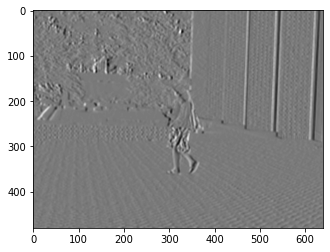

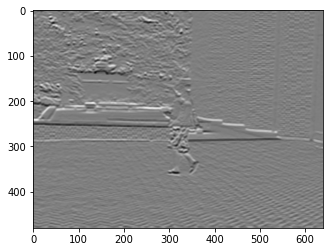

In [8]:
plt.imshow(Ix, cmap = 'gray')
plt.show()
plt.imshow(Iy, cmap = 'gray')
plt.show()

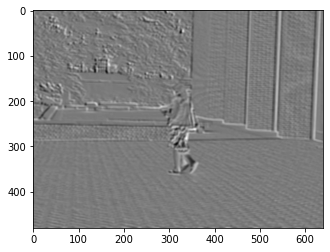

In [9]:
plt.imshow(It, cmap = 'gray')
plt.show()

In [10]:
window_size = 5

In [11]:
def getANeighbourhood(i, j, Ix, Iy, window_size):
    st = window_size//2
    A = np.zeros((2, 2))
    
    Ix_window = Ix[i - st: i + st + 1, j - st: j + st + 1]
    Iy_window = Iy[i - st: i + st + 1, j - st: j + st + 1]
    Ixy_window = Ix_window*Iy_window
  
    sIx = np.sum(Ix_window**2)
    sIy = np.sum(Iy_window**2)
    sIxy = np.sum(Ixy_window)
    A[0][0] = sIx
    A[1][1] = sIy
    A[0][1] = sIxy
    A[1][0] = sIxy
    
    return A

In [12]:
def getbNeighbourhood(i, j, Ix, Iy, It, window_size):
    st = window_size//2
    b = np.zeros((2, 1))
    It_window = It[i - st: i + st + 1, j - st: j + st + 1]
    Ix_window = Ix[i - st: i + st + 1, j - st: j + st + 1]
    Iy_window = Iy[i - st: i + st + 1, j - st: j + st + 1]
    b[0] = -np.sum(It_window*Ix_window)
    b[1] = -np.sum(It_window*Iy_window)
    return b

In [13]:
def lucasKanade(img1, img2, Ix, Iy, It, window_size):
    st = window_size//2
    u = np.zeros((img1.shape))
    v = np.zeros((img2.shape))
    for i in range(st, img1.shape[0] - st):
        for j in range(st, img1.shape[1] - st):
            
            A = getANeighbourhood(i, j, Ix, Iy, window_size)   ### this is A'A
            B = getbNeighbourhood(i, j, Ix, Iy, It, window_size)   ### this is B = A'b
            velocityVec = np.linalg.lstsq(A, B, None)[0]  ### solution: inv(A'A)*B
            u[i, j] = velocityVec[0]
            v[i, j] = velocityVec[1]
    return u, v

In [14]:
vel = lucasKanade(img1, img2, Ix, Iy, It, 5)

In [15]:
u = vel[0]
v = vel[1]

In [16]:
rows, cols = u.shape

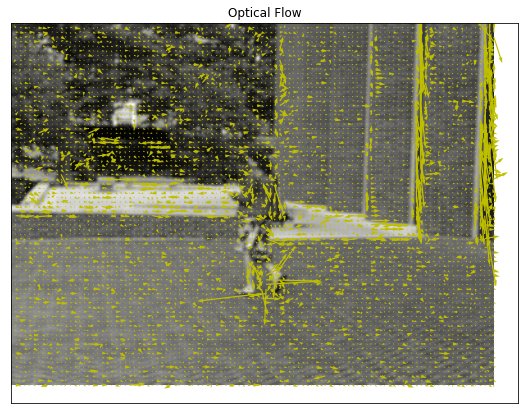

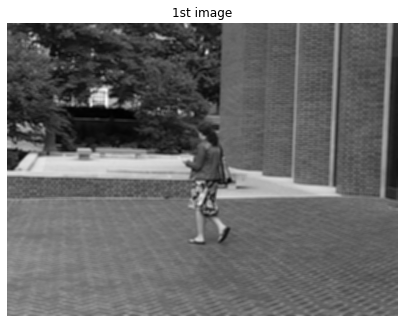

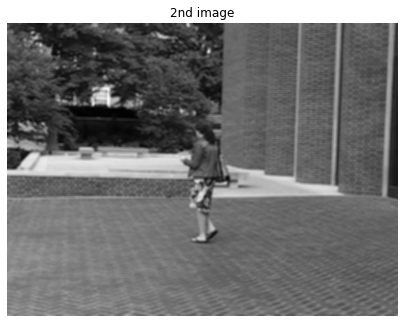

In [17]:
vector_mag = np.sqrt(u ** 2 + v ** 2)

# Subsample the vector field to make it less dense
subsample = 6
sub_u = u[0:rows:subsample, 0:cols:subsample] 
sub_v = v[0:rows:subsample, 0:cols:subsample]
xc = np.linspace(0, cols, sub_u.shape[1])
yc = np.linspace(0, rows, sub_u.shape[0])
# Locations of the vectors
xv, yv = np.meshgrid(xc, yc)
fig0 = plt.figure(figsize = (14,7))
plt.imshow(img1,cmap = 'gray')
plt.title('Optical Flow'), plt.xticks([]), plt.yticks([])
# Plot the vectors
plt.quiver(xv, yv, sub_u, sub_v, color='y')

        
#vector_im = vector_im * 255            

fig1 = plt.figure(figsize = (7,7))
plt.axis('off')
plt.imshow(img1, cmap='gray')
plt.title("1st image")
plt.show()  
fig2 = plt.figure(figsize = (7,7))
plt.axis('off')
plt.imshow(img2, cmap='gray')
plt.title("2nd image")
plt.show() 